<a href="https://colab.research.google.com/github/Ajied21/Web_Scraping_Dibimbing.id/blob/master/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
    <img src="https://assets.charltonmedia.com/s3fs-public/styles/article_node_main_image/public/2024-02/2-what-is-tokopedia_-1.png?h=1ed620cb&itok=nGc9HImI"
    alt="Tokopedia" style="width: 50%;">
</div>

Sebagai seorang Data Engineer, saya akan melakukan metode web scraping pada sebuah website e-commerce di Indonesia . Saya mengambil informasi dari situs tersebut dan juga untuk menampilkan detail dari data yang di-scrape dalam bentuk pandas dataframe. Data tersebut mengenai informasi tentang produk laptop gaming yang di jual di Indonesia.

Tujuan:
Menganalisis dan memvisualisasikan data produk laptop gaming di Tokopedia untuk memahami distribusi harga, perbandingan rating, ulasan toko dan lainnya.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("./Tokopedia_Laptop_Gaming.csv", low_memory=True)

In [8]:
df.head()

,id,name,brand,price,rating,count_review,status_Official,power_badge,location,shop_name,URL
0,10370455805,ACER Nitro V 15 ANV15 51 542G RTX2050 i5 13420...,acer,10799000,5.0,296,True,True,Jakarta Utara,Acer Authorized Store Jakarta,https://www.tokopedia.com/acer-jakarta/acer-ni...
1,12185850813,ACER Predator Helios Neo 16 93DR RTX4060 i9 13...,acer,23799000,5.0,23,True,True,Jakarta Utara,Acer Authorized Store Jakarta,https://www.tokopedia.com/acer-jakarta/acer-pr...
2,11658539536,ACER NITRO V 15 I5 13420H RTX2050 8GB 512GB SS...,acer,10622000,5.0,47,True,True,Jakarta Utara,AGRES ID,https://www.tokopedia.com/agresid/acer-nitro-v...
3,11714103177,Acer Nitro V 15 GeForce RTX 4050 - I5 13420H 8...,acer,14349000,5.0,40,True,True,Jakarta Utara,NVIDIA GeForce Laptop,https://www.tokopedia.com/nvidiageforcelt/acer...
4,8636802981,Lenovo IdeaPad Gaming 3 15ARH7 I RTX4050 6GB R...,lenovo,13999000,5.0,22,True,True,Yogyakarta,Lenovo Authorized Yogyakarta Selatan,https://www.tokopedia.com/lenovoyogyakartasela...


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6000 non-null   int64  
 1   name             6000 non-null   object 
 2   brand            5800 non-null   object 
 3   price            6000 non-null   int64  
 4   rating           6000 non-null   float64
 5   count_review     6000 non-null   int64  
 6   status_Official  6000 non-null   bool   
 7   power_badge      6000 non-null   bool   
 8   location         6000 non-null   object 
 9   shop_name        6000 non-null   object 
 10  URL              6000 non-null   object 
dtypes: bool(2), float64(1), int64(3), object(5)
memory usage: 433.7+ KB


,id,price,rating,count_review
count,6.000000e+03,6.000000e+03,6000.000000,6000.000000
mean,1.242998e+10,1.525452e+07,4.916667,39.950000
std,1.321396e+09,5.235107e+06,0.640149,52.507209
min,8.307551e+09,9.599000e+06,0.000000,0.000000
25%,1.175213e+10,1.133650e+07,5.000000,8.000000
50%,1.271384e+10,1.258850e+07,5.000000,22.500000
75%,1.310443e+10,1.839900e+07,5.000000,47.250000
max,1.466833e+10,3.249900e+07,5.000000,296.000000


Matplotlib & Seaborn

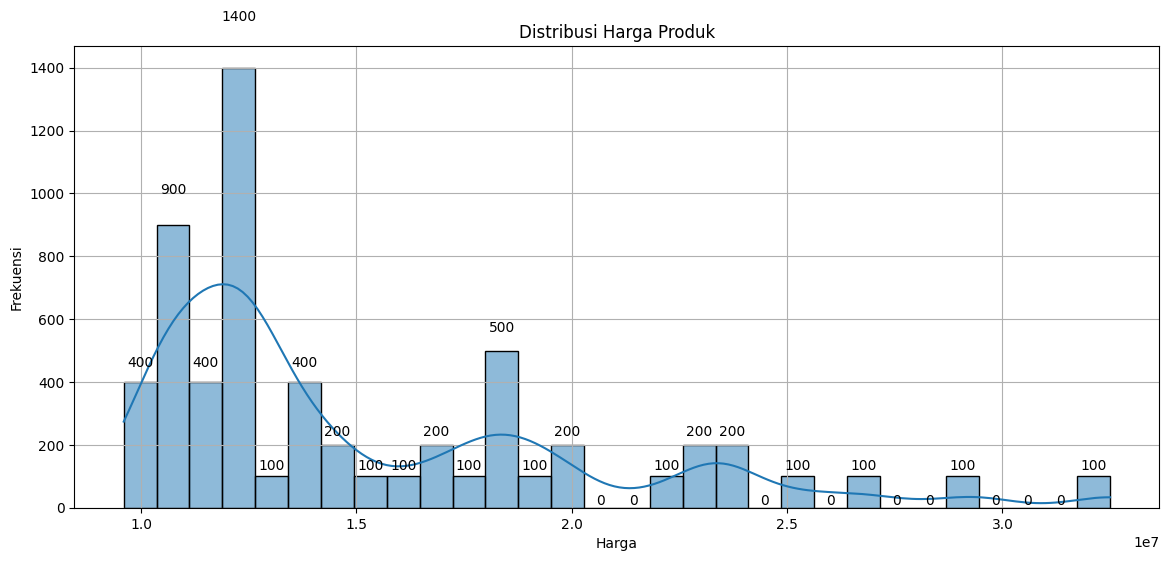

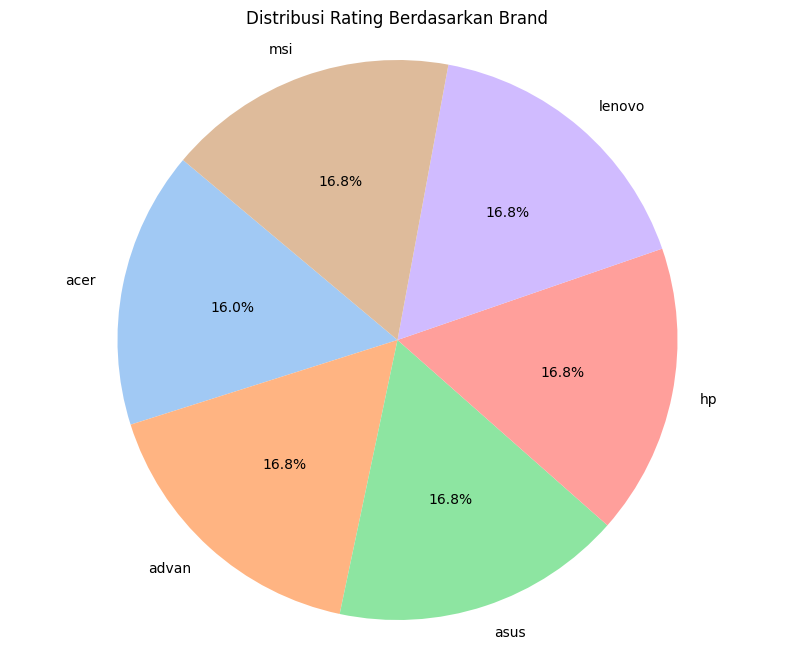

<ipython-input-10-25293d7c66bc>:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




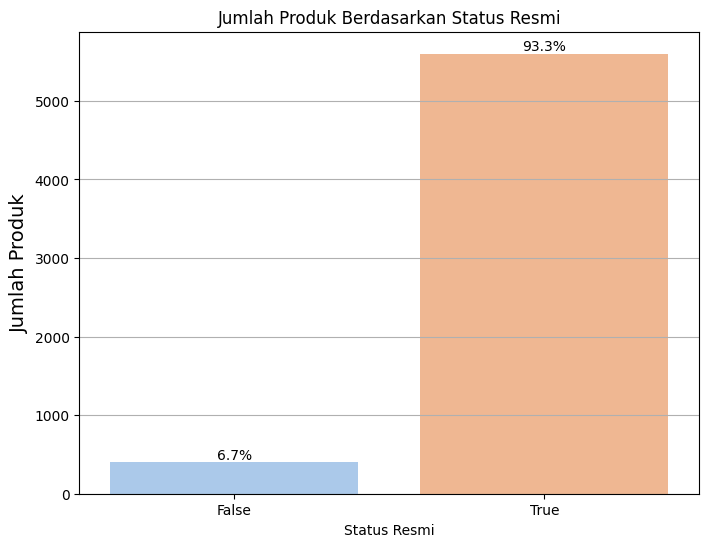

<ipython-input-10-25293d7c66bc>:64: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




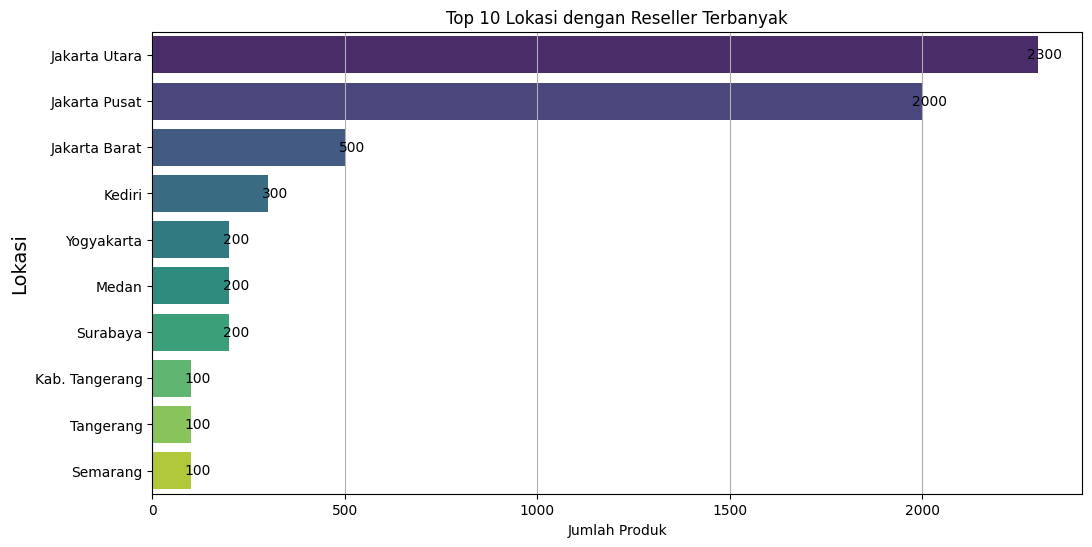

<ipython-input-10-25293d7c66bc>:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




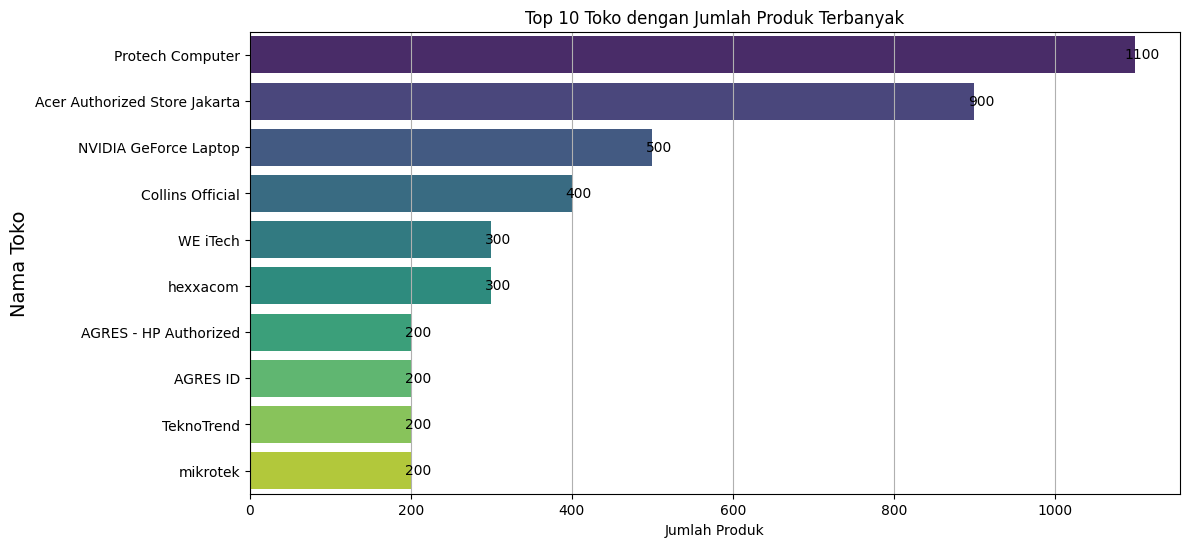

<ipython-input-10-25293d7c66bc>:111: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-10-25293d7c66bc>:120: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




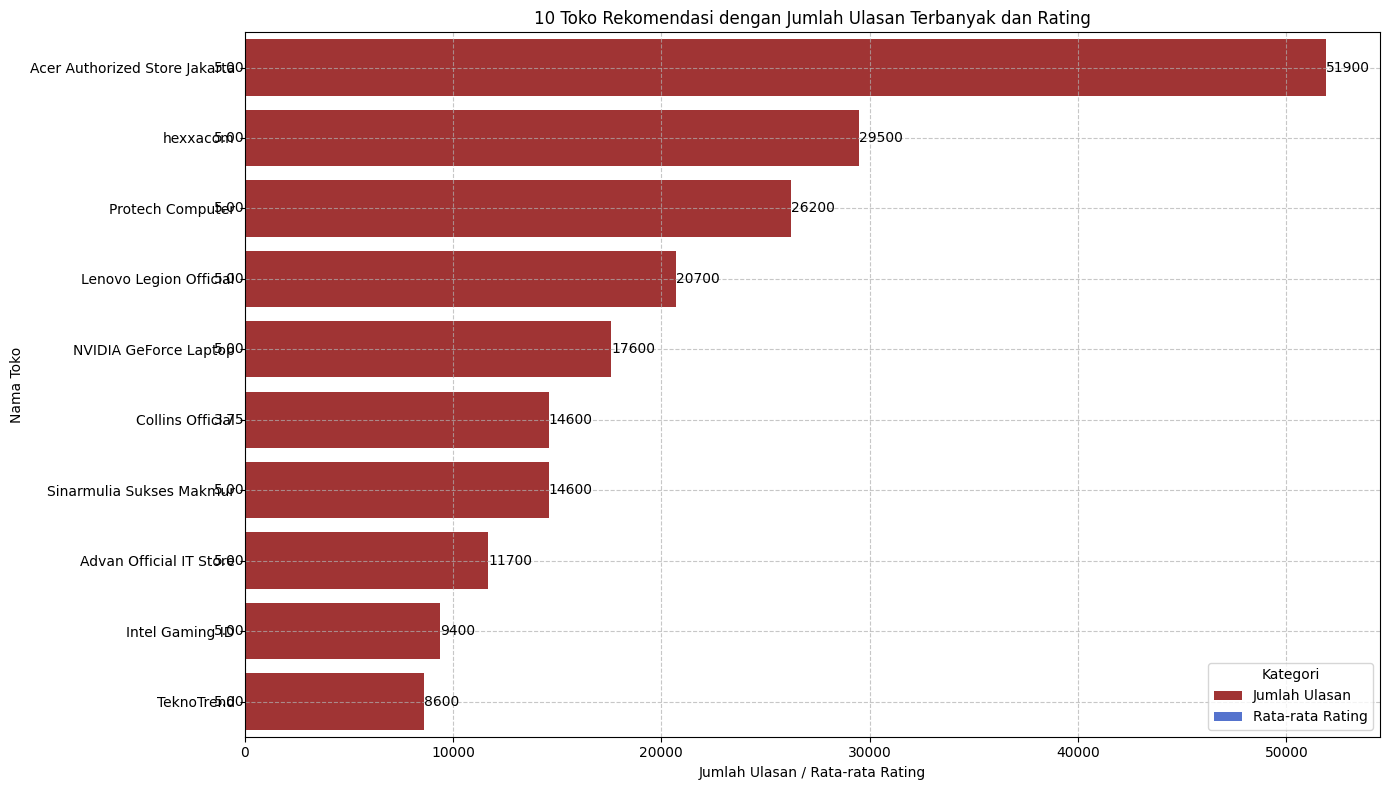

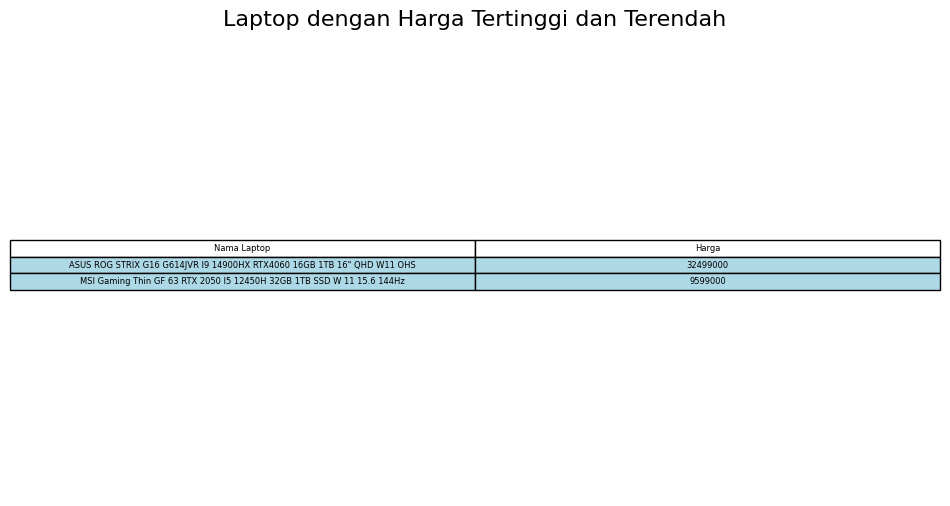

In [10]:
# Membuat histogram dengan seaborn
plt.figure(figsize=(14, 6))
histplot = sns.histplot(df['price'], bins=30, kde=True)

# Menambahkan keterangan angka pada setiap bin
for patch in histplot.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width / 2
    y = height + 0.1 * height  # Menambahkan sedikit offset untuk keterangan

    # Menambahkan teks keterangan angka
    plt.text(x, y, f'{height:.0f}', ha='center', va='bottom')

plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Mengelompokkan data berdasarkan brand dan menghitung rata-rata rating
average_rating_by_brand = df.groupby('brand')['rating'].mean()

# Menghapus nilai NaN (brand yang tidak teridentifikasi)
average_rating_by_brand = average_rating_by_brand.dropna()

# Membuat pie chart menggunakan Matplotlib
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')[0:len(average_rating_by_brand)]

plt.pie(average_rating_by_brand, labels=average_rating_by_brand.index, colors=colors,
        autopct='%1.1f%%', startangle=140)

plt.title('Distribusi Rating Berdasarkan Brand')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Membuat countplot dengan seaborn
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x='status_Official', data=df, palette='pastel')

# Menambahkan keterangan persentase di atas setiap bar
total = len(df['status_Official'])
for patch in countplot.patches:
    height = patch.get_height()
    percentage = 100 * height / total
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.5  # Menambahkan sedikit offset untuk keterangan

    # Menambahkan teks keterangan persentase
    plt.text(x, y, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Jumlah Produk Berdasarkan Status Resmi')
plt.xlabel('Status Resmi')
plt.ylabel('Jumlah Produk', fontsize=14)  # Memperbesar ukuran label sumbu-y
plt.grid(axis='y')
plt.show()

# Menghitung jumlah produk per lokasi
location_counts = df['location'].value_counts().head(10)

# Plot dengan seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Top 10 Lokasi dengan Reseller Terbanyak')
plt.xlabel('Jumlah Produk')
plt.ylabel('Lokasi', fontsize=14)
plt.grid(axis='x')

# Menambahkan keterangan angka
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

# Menghitung jumlah produk per toko
shop_name_counts = df['shop_name'].value_counts().head(10)

# Menghitung jumlah produk per toko
shop_name_counts = df['shop_name'].value_counts().head(10)

# Plot dengan seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=shop_name_counts.values, y=shop_name_counts.index, palette='viridis')
plt.title('Top 10 Toko dengan Jumlah Produk Terbanyak')
plt.xlabel('Jumlah Produk')
plt.ylabel('Nama Toko', fontsize=14)
plt.grid(axis='x')

# Menambahkan keterangan angka
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

# Mengelompokkan data berdasarkan shop_name dan menghitung rata-rata rating serta jumlah ulasan
shop_stats = df.groupby('shop_name').agg({
    'rating': 'mean',
    'count_review': 'sum'
}).sort_values(by='count_review', ascending=False)

# Mengambil 10 toko dengan jumlah ulasan terbanyak
top_10_shops = shop_stats.head(10)

# Menyiapkan ukuran plot
plt.figure(figsize=(14, 8))

# Membuat bar chart horizontal untuk jumlah ulasan
sns.barplot(
    y=top_10_shops.index,
    x=top_10_shops['count_review'],
    color='firebrick',
    label='Jumlah Ulasan',
    ci=None
)

# Membuat bar chart horizontal untuk rating
sns.barplot(
    y=top_10_shops.index,
    x=top_10_shops['rating'],
    color='royalblue',
    label='Rata-rata Rating',
    ci=None
)

# Menambahkan keterangan angka
for index, value in enumerate(top_10_shops['count_review']):
    plt.text(value, index, f'{value:.0f}', va='center', ha='left', color='black')
for index, value in enumerate(top_10_shops['rating']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='right', color='black')

# Mengatur label sumbu
plt.title('10 Toko Rekomendasi dengan Jumlah Ulasan Terbanyak dan Rating')
plt.xlabel('Jumlah Ulasan / Rata-rata Rating')
plt.ylabel('Nama Toko')

# Menambahkan legenda
plt.legend(title='Kategori')

# Mengatur grid dan layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

# Menentukan laptop dengan harga termahal dan terendah
laptop_termahal = df.loc[df['price'].idxmax()]
laptop_terendah = df.loc[df['price'].idxmin()]

# Membuat DataFrame untuk tabel
data = pd.DataFrame({
    'Nama Laptop': [laptop_termahal['name'], laptop_terendah['name']],
    'Harga': [laptop_termahal['price'], laptop_terendah['price']]
})

# Menampilkan tabel menggunakan matplotlib dengan ukuran gambar diperbesar
fig, ax = plt.subplots(figsize=(12, 6))  # Ukuran gambar diperbesar
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data.values, colLabels=data.columns, cellLoc='center', loc='center',
                 cellColours=[['lightblue'] * 2] * len(data))
plt.title('Laptop dengan Harga Tertinggi dan Terendah', fontsize=16)
plt.show()

Plotly

In [11]:
# Membuat bar chart untuk distribusi harga produk
fig = go.Figure()

# Membuat histogram menggunakan pandas
price_counts = df['price'].value_counts(bins=30).sort_index()

# Menambahkan bar chart ke figure
fig.add_trace(go.Bar(
    x=[f'{interval.left:.0f}-{interval.right:.0f}' for interval in price_counts.index],
    y=price_counts.values,
    text=price_counts.values,
    textposition='outside'
))

# Menyederhanakan keterangan di sumbu x
# Mengatur interval keterangan sumbu x
x_tickvals = [f'{i}' for i in range(0, int(df['price'].max()) + 1, int(df['price'].max() // 10))]
fig.update_layout(
    title='Distribusi Harga Produk',
    xaxis_title='Harga',
    yaxis_title='Frekuensi',
    xaxis_tickvals=x_tickvals,
    xaxis_ticktext=[f'{i}' for i in x_tickvals],
    xaxis_tickangle=-45
)

# Menampilkan figure
fig.show()

# Mengelompokkan data berdasarkan brand dan menghitung rata-rata rating
average_rating_by_brand = df.groupby('brand')['rating'].mean()

# Menghapus nilai NaN (brand yang tidak teridentifikasi)
average_rating_by_brand = average_rating_by_brand.dropna()

# Membuat pie chart menggunakan Plotly
fig = px.pie(values=average_rating_by_brand, names=average_rating_by_brand.index,
             title='Distribusi Rating Berdasarkan Brand',
             labels={'brand': 'Brand', 'rating': 'Rata-rata Rating'},
             hole=0.3)

# Menambahkan anotasi untuk persentase
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

# Menghitung jumlah produk berdasarkan status resmi
status_counts = df['status_Official'].value_counts()
status_percent = (status_counts / status_counts.sum()) * 100

# Membuat histogram dengan plotly
fig = px.histogram(df, x='status_Official', title='Jumlah Produk Berdasarkan Status Resmi', labels={'status_Official': 'Status Resmi'})
fig.update_layout(xaxis_title='Status Resmi', yaxis_title='Jumlah Produk')

# Menambahkan anotasi persentase
annotations = []
for idx, value in status_counts.items():
    percentage = status_percent[idx]
    annotations.append(
        go.layout.Annotation(
            x=idx,
            y=value,
            text=f'{percentage:.1f}%',
            showarrow=False,
            yshift=10
        )
    )

fig.update_layout(annotations=annotations)
fig.show()

# Menghitung jumlah produk per lokasi dan menyortir dari yang tertinggi ke terendah
location_counts = df['location'].value_counts().head(10).reset_index()
location_counts.columns = ['location', 'count']
location_counts = location_counts.sort_values(by='count', ascending=True)

# Plot dengan Plotly
fig = px.bar(location_counts, x='count', y='location', title='Top 10 Lokasi dengan Reseller Terbanyak',
             labels={'location': 'Lokasi', 'count': 'Jumlah Produk'}, orientation='h')

# Menambahkan keterangan angka di atas setiap batang
fig.update_traces(text=location_counts['count'], textposition='outside')

fig.update_layout(xaxis_title='Jumlah Produk', yaxis_title='Lokasi')
fig.show()

# Menghitung jumlah produk per toko dan menyortir dari yang tertinggi ke terendah
shop_name_counts = df['shop_name'].value_counts().head(10).reset_index()
shop_name_counts.columns = ['shop_name', 'count']
shop_name_counts = shop_name_counts.sort_values(by='count', ascending=True)

# Plot dengan Plotly
fig = px.bar(shop_name_counts, x='count', y='shop_name', title='Top 10 Toko dengan Jumlah Produk Terbanyak',
             labels={'shop_name': 'Nama Toko', 'count': 'Jumlah Produk'}, orientation='h')

# Menambahkan keterangan angka di atas setiap batang
fig.update_traces(text=shop_name_counts['count'], textposition='outside')

fig.update_layout(xaxis_title='Jumlah Produk', yaxis_title='Nama Toko')
fig.show()

# Mengelompokkan data berdasarkan shop_name dan menghitung rata-rata rating serta jumlah ulasan
shop_stats = df.groupby('shop_name').agg({
    'rating': 'mean',
    'count_review': 'sum'
}).sort_values(by='count_review', ascending=False)  # Mengubah ke descending

# Mengambil 10 toko dengan jumlah ulasan terbanyak
top_10_shops = shop_stats.head(10)

# Membuat figure Plotly
fig = go.Figure()

# Menambahkan bar untuk rating
fig.add_trace(go.Bar(
    y=top_10_shops.index,
    x=top_10_shops['rating'],
    name='Rata-rata Rating',
    orientation='h',
    marker_color='royalblue',
    text=top_10_shops['rating'].round(2),
    textposition='outside'
))

# Menambahkan bar untuk jumlah ulasan
fig.add_trace(go.Bar(
    y=top_10_shops.index,
    x=top_10_shops['count_review'],
    name='Jumlah Ulasan',
    orientation='h',
    marker_color='firebrick',
    text=top_10_shops['count_review'],
    textposition='outside',
    xaxis='x2'
))

# Mengatur layout
fig.update_layout(
    title='10 Toko Rekomendasi dengan Jumlah Ulasan Terbanyak dan Rating',
    xaxis_title='Jumlah Ulasan',
    xaxis2=dict(
        title='Rata-rata Rating',
        overlaying='x',
        side='top'
    ),
    yaxis_title='Nama Toko',
    barmode='overlay',
    legend_title='Kategori',
    showlegend=True,
    xaxis=dict(
        title='Jumlah Ulasan',
        zeroline=False
    ),
    yaxis=dict(
        title='Nama Toko',
        zeroline=False
    )
)

# Menampilkan plot
fig.show()


# Menentukan laptop dengan harga termahal dan terendah
laptop_termahal = df.loc[df['price'].idxmax()]
laptop_terendah = df.loc[df['price'].idxmin()]

# Membuat DataFrame untuk tabel
data = pd.DataFrame({
    'Nama Laptop': [laptop_termahal['name'], laptop_terendah['name']],
    'Harga': [laptop_termahal['price'], laptop_terendah['price']]
})

# Menampilkan tabel menggunakan Plotly dengan ukuran tabel diperbesar
fig = go.Figure(data=[go.Table(
    header=dict(values=['Nama Laptop', 'Harga'], fill_color='paleturquoise', align='center', font_size=16),
    cells=dict(values=[data['Nama Laptop'], data['Harga']], fill_color='lavender', align='center', font_size=14))
])

fig.update_layout(title_text='Laptop dengan Harga Tertinggi dan Terendah', title_x=0.5)
fig.update_layout(
    autosize=False,
    width=800,  # Lebar tabel
    height=400  # Tinggi tabel
)
fig.show()